<a href="https://colab.research.google.com/github/jcvl-udg/DefaultReactXR/blob/main/AquaCrop_OSPy_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AquaCrop-OSPy: Bridging the gap between research and practice in crop-water modelling


This series of notebooks provides users with an introduction to AquaCrop-OSPy, an open-source Python implementation of the U.N. Food and Agriculture Organization (FAO) AquaCrop model. AquaCrop-OSPy is accompanied by a series of Jupyter notebooks, which guide users interactively through a range of common applications of the model. Only basic Python experience is required, and the notebooks can easily be extended and adapted by users for their own applications and needs.


This notebook series consists of four parts:

1.   <a href=https://colab.research.google.com/github/thomasdkelly/aquacrop/blob/master/tutorials/AquaCrop_OSPy_Notebook_1.ipynb>Running an AquaCrop-OSPy model</a>
2.   <a href=https://colab.research.google.com/github/thomasdkelly/aquacrop/blob/master/tutorials/AquaCrop_OSPy_Notebook_2.ipynb>Estimation of irrigation water demands</a>
3.   <a href=https://colab.research.google.com/github/thomasdkelly/aquacrop/blob/master/tutorials/AquaCrop_OSPy_Notebook_3.ipynb>Optimisation of irrigation management strategies</a>
4.  <a href=https://colab.research.google.com/github/thomasdkelly/aquacrop/blob/master/tutorials/AquaCrop_OSPy_Notebook_4.ipynb>Projection of climate change impacts</a>


# Notebook 1: Getting started: Running your first simulation with AquaCrop-OSPy



In this notebook, you will learn interactively how to setup and run you first AquaCrop-OSPy simulation. We begin by showing how to define key model input parameters and variables, and then show how to execute a model simulation and interpret output files.

The first of these notebooks outlines how to setup and run single and multi-season simulations for a selected cropping system. Examples are provided about how to setup and define relevant crop, soil, weather and management parameter values and inputs, with more advanced customization guides given in the Appendices A-D.

## Notes on Google Colab

If you are unfamiliar with Jupyter Notebooks or Google Colab, <a href="https://colab.research.google.com/notebooks/intro.ipynb">here</a> is an introductory notebook to get you started. In short, these are computable documents that let you combine text blocks such as these (including html, LaTeX, etc.) with code blocks that you can write, edit and execute. To run the code in each cell either click the run button in the cell's top left corner or hit SHIFT-ENTER when the cell is selected. You can also navigate through the document using the table of contents on the left hand side.

We recommend you save a copy of this notebook to your dive (File->Save a copy to drive). Then any changes you make to this notebook will be saved and you can open it it again at any time and carry on.

<a id='Imports'><a/>

## Imports



In order to use AquaCrop-OSPy inside this notebook we first need to install and import it. Installing aquacrop is as simple as running `pip install aquacrop` or `!pip install aquacrop==VERSION` to install a specific version. In cell below we also use the `output.clear` function to keep everything tidy.

In [2]:
!pip install aquacrop

from google.colab import output
output.clear()

In case the installation through pip fails for any reason, you can install direct from GitHub using the cell below.

In [ ]:
# !pip install git+https://github.com/aquacropos/aquacrop

# from google.colab import output
# output.clear()

If for any reason you would rather not compile the aquacrop modules ahead-of-time, you can run the following cell to run the notebook in pure python (N.B. it will run slower).

In [ ]:
# import os
# os.environ['DEVELOPMENT'] = 'True'

Now that `aquacrop` is installed we need to import the various components into the notebook. All these functions do not have to be imported at once as we have done in the cell below but it will help keep things clearer throughout this notebook.

In [3]:
from aquacrop import AquaCropModel, Soil, Crop, InitialWaterContent, FieldMngt, GroundWater
from aquacrop.utils import prepare_weather, get_filepath

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting Model Components

Running an AquaCrop-OSPy model requires the selection of 5 components:

1.   Daily climate measurements
3.   Soil selection
4.   Crop selection
5.   Initial water content
1.   Simulation start and end dates

We will go through the selection of these components in turn below.

## Climate Measurements

AquaCrop-OSPy requires weather data to be specified over the cropping period being simulated. This includes a daily time series of minimum and maximum temperatures [C], precipitation [mm], and reference crop evapotranspiration [mm].

To import these data into the model, a .txt file containing relevant weather data must be created by the user in the following space delimited format.

![picture](https://drive.google.com/uc?export=view&id=1WG0gN4fCYgQs-EQXhXUvNrPktFJOZut9)

If you are running this notebook locally you will need to specify the file path to the weather data file on your computer. If you are running the notebook via Google Colab you can upload the file through the tab on the left so that it is available in the current directory.

![picture](https://drive.google.com/uc?export=view&id=1xTg4b1W-Nvi8kuK3ytVybTZpaWSflnNE)

To load the weather data into the model, use the `prepare_weather` function, passing in the filepath of the .txt file. This `prepare_weather` function will create a pandas DataFrame in Python storing the imported weather data in the correct format for subsequent simulations.



In [ ]:
# specify filepath to weather file (either locally or imported to colab)
# filepath= 'YOUR_WEATHER_FILE.TXT'

# weather_data = prepare_weather(filepath)
# weather_data

AquaCrop-OSPy also contains a number of in-built example weather files. These can be accessed using the `get_filepath` function as shown below. Once run then use the `prep_weather` function as above to convert the data to a pandas DataFrame ready for use. A full list of the built-in weather files can be found in Appendix A.

In [4]:
# locate built in weather file
filepath=get_filepath('tunis_climate.txt')

weather_data = prepare_weather(filepath)
weather_data

,MinTemp,MaxTemp,Precipitation,ReferenceET,Date
0,15.0,20.0,0.0,1.5,1979-01-01
1,8.0,15.0,0.0,1.3,1979-01-02
2,3.0,12.0,0.0,1.2,1979-01-03
3,5.0,19.0,0.0,1.8,1979-01-04
4,10.0,17.0,0.0,1.4,1979-01-05
...,...,...,...,...,...
8547,17.3,32.5,0.0,7.0,2002-05-27
8548,16.8,24.4,0.0,4.9,2002-05-28
8549,15.0,27.8,0.0,6.0,2002-05-29
8550,14.1,30.0,0.0,6.4,2002-05-30


## Soil



Selecting a soil type for an AquaCrop-OSPy simulation is done via the `Soil` object. This object contains all the compositional and hydraulic properties needed for the simulation. The simplest way to select a `Soil` is to use one of the built-in soil types taken from AquaCrop defaults. A visual representation of these defaults is shown below.

![picture](https://drive.google.com/uc?export=view&id=11CDRTYgYrYxsQyEwih_0jDAozIu_l-ak)

As an example, to select a 'sandy loam' soil, run the cell below. Appendix B details how a user can edit any of these built-in soil types or create their own custom soil profile.

In [6]:
sandy_loam = Soil(soil_type='SandyLoam')

## Crop

The crop type used in the simulation is selected in a similar way to soil via a `Crop`. To select a `Crop` you need to specify the crop type and planting date. Any of the built-in crop types (currently Maize, Wheat, Rice, Potato) can be selected by running the cell below. Appendix C details how a user can edit any of the built-in crop parameters or create custom crops.

In [8]:
wheat = Crop('Wheat', planting_date='10/01')

## Initial water content

Specifying the intial soil-water content at the begining of the simulation is done via the `InitialWaterContent`. When creating an `InitialWaterContent`, it needs a list of locations and soil water contents. This table below details all the input paramaters for the `InitialWaterContent`. For a more detailed example, see the third section of Appendix D: Initial water content.

Variable Name | Type | Description | Default
--- | --- | --- | ---
wc_type| `str` | Type of value | 'Prop'
|| 'Prop' = 'WP' / 'FC' / 'SAT' |
|| 'Num' = XXX m3/m3 |
|| 'Pct' = % TAW |
Method | `str` | 'Depth' = Interpolate depth points; 'Layer' = Constant value for each soil layer | 'Layer'
depth_layer| `list` | locations in soil profile (soil layer or depth) | [1]
value| `list` | value at that location | ['FC']

In the cell below we initialize the water content to be Field Capacity (FC) accross the whole soil profile.


In [10]:
InitWC = InitialWaterContent(value=['FC'])

## Model

Additional model components you can specify include irrigation management, field management and groundwater conditions as well as field management during fallow periods. Details on how to specify these are detailed in Appendix D however they will all default to none if not specified.

Once you have defined your weather data, `Crop`,  `Soil` and `InitWC` then you're ready to run your simulation.


To run a simulation we need to combine the components we have selected into an `AquaCropModel`. It is here where we specify the simulation start date and end date (YYYY/MM/DD). Running the cell below will create an AquaCropModel simulation with all the parameters we have specified so far.

In [12]:
# combine into aquacrop model and specify start and end simulation date
model = AquaCropModel(sim_start_time=f'{1979}/10/01',
                      sim_end_time=f'{1985}/05/30',
                      weather_df=weather_data,
                      soil=sandy_loam,
                      crop=wheat,
                      initial_water_content=InitWC)

The model can then be run forwards N days using `.run_model(N)`. Most of the time you will want to instead run the model till the end of the simulation which is done by running `.run_model(till_termination=True)`


In [13]:
# run model till termination
model.run_model(till_termination=True)

True

Once the model has finished running, four different output files will be produced. The `water_flux` output shows daily water flux variables such as total water storage. The `water_storage` output shows daily water storage in each compartment. The `crop_growth` output details daily crop variables such as canopy cover. The `final_stats` output lists the final Yield and total Irrigation for each season. These outputs can be accessed through the cell below. Use `.head(N)` to view the first `N` rows. Full details on the output files can be found in Appendix E.

In [41]:
#model._outputs.water_flux.head()
#model._outputs.water_storage.head()
#model._outputs.crop_growth.head()
model._outputs.final_stats.head()

,Season,crop Type,Harvest Date (YYYY/MM/DD),Harvest Date (Step),Dry yield (tonne/ha),Fresh yield (tonne/ha),Yield potential (tonne/ha),Seasonal irrigation (mm)
0,0,Wheat,1980-04-15,196,8.940140,9.933489,8.945246,0
1,1,Wheat,1981-04-16,562,8.309577,9.232863,8.314556,0
2,2,Wheat,1982-04-16,927,9.136122,10.151246,9.141264,0
3,3,Wheat,1983-04-16,1292,8.811568,9.790631,8.816327,0
4,4,Wheat,1984-04-15,1657,8.682660,9.647400,8.687385,0


Congratulations, you have run your first AquaCrop-OSPy model. As a final example, let's create and run another model with a different soil type and compare the results.

In [25]:
# combine into aquacrop model and specify start and end simulation date
model_clay = AquaCropModel(sim_start_time=f'{1979}/10/01',
                      sim_end_time=f'{1985}/05/30',
                      weather_df=weather_data,
                      soil=Soil('Clay'),
                      crop=wheat,
                      initial_water_content=InitWC)

model_clay.run_model(till_termination=True)

True

Let's use the pandas library to collate our seasonal yields so we can visualize our results.

In [51]:
import pandas as pd # import pandas library

names=['Sandy Loam','Clay']

#combine our two output files
dflist=[model._outputs.final_stats,
        model_clay._outputs.final_stats]

outlist=[]
for i in range(len(dflist)): # go through our two output files
    temp = pd.DataFrame(dflist[i]['Fresh yield (tonne/ha)']) # extract the seasonal yield data
    temp['label']=names[i] # add the soil type label
    outlist.append(temp) # save processed results

# combine results
all_outputs = pd.concat(outlist,axis=0)

Now we can leverage some of pythons great plotting libraries `seaborn` and `matplotlib` to visualize and compare the yields from the two different soil types.

Text(0, 0.5, 'Fresh yield (tonne/ha)')

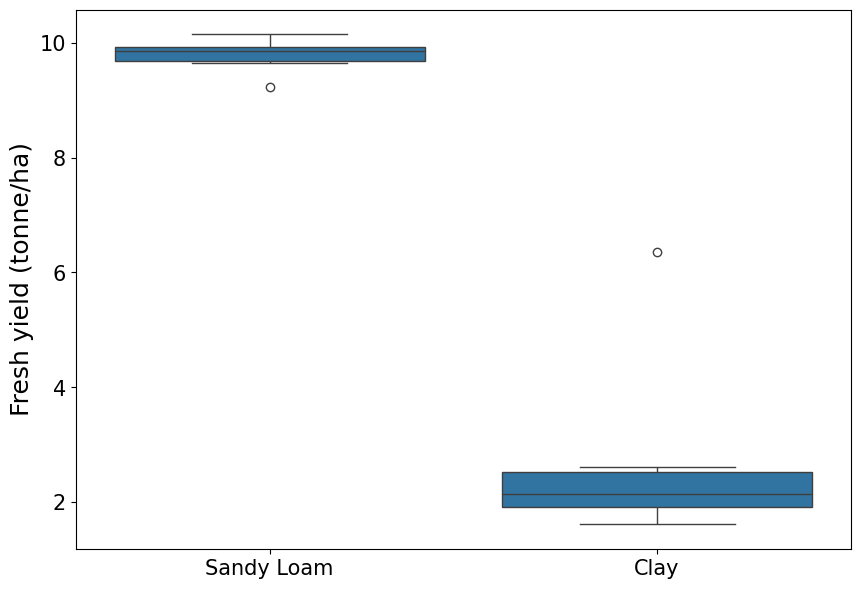

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

#create figure
fig,ax=plt.subplots(1,1,figsize=(10,7),)

# create box plot
sns.boxplot(data=all_outputs,x='label',y='Fresh yield (tonne/ha)',ax=ax,)

# labels and font sizes
ax.tick_params(labelsize=15)
ax.set_xlabel(' ')
ax.set_ylabel('Fresh yield (tonne/ha)',fontsize=18)

And this brings an end to Notebook 1. Feel free to edit any of the code cells, import your own weather data, try new soils and crops.

In Notebook 2 we use the model to estimate irrigation water demands.

## Fresh & Dry Yield performance

In [53]:
names=['Sandy Loam','Clay']

#combine our two output files
dflist_2=[model._outputs.final_stats,
        model_clay._outputs.final_stats]

outlist_2=[]
for i in range(len(dflist)): # go through our two output files
    temp = pd.DataFrame(dflist[i]['Dry yield (tonne/ha)']) # extract the seasonal yield data
    temp['label']=names[i] # add the soil type label
    outlist_2.append(temp) # save processed results

# combine results
all_outputs_2 = pd.concat(outlist_2,axis=0)

Text(0, 0.5, 'Dry yield (tonne/ha)')

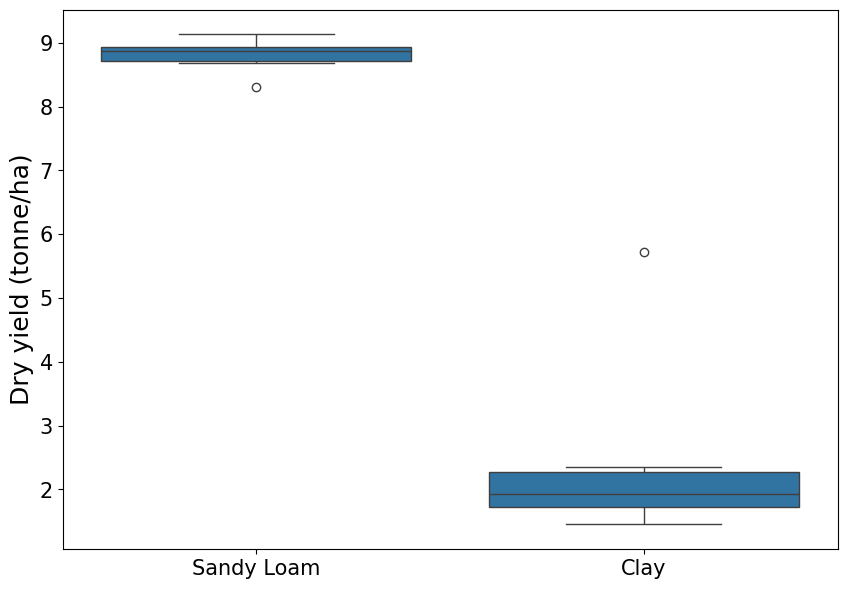

In [54]:
#create figure
fig_2,ax_2=plt.subplots(1,1,figsize=(10,7),)

# create box plot
sns.boxplot(data=all_outputs_2,x='label',y='Dry yield (tonne/ha)',ax=ax_2,)

# labels and font sizes
ax_2.tick_params(labelsize=15)
ax_2.set_xlabel(' ')
ax_2.set_ylabel('Dry yield (tonne/ha)',fontsize=18)

### Why fresh/dry yield have the same value?

Al configurar el IWC del modelo y no definir configuracion para el tipo de irrigacion, ambos suelos(SOIL) mantienen el mismo coeficiente de rendimiento , produciendo la misma cantidad de biomasa para ambos casos. Para probar la irrigacion "por temporal" se configura de la siguiente manera.

--  al agregar los datos climaticos de Nebraska se debe definir las fechas correspondientes a las mediciones (inicia en 1982)
ademas en la primera prueba no se llego al crecimiento de la planta pues el frio detuvo su desarrollo.

- print(maiz_model_clay._outputs.crop_growth['stage'])   # last stage = 0 or 1
- print(maiz_model_clay._outputs.crop_growth['time_harvest'])  # NaT

In [110]:
from aquacrop import IrrigationManagement
#Irrigacion de temporal
irr = IrrigationManagement(irrigation_method=0)   # 0 = rain-fed
#Crop elegido: Maiz --- Clima utilizado: Champion, Nebraska
maizito = Crop('Maize', planting_date='05/01') # mayo para mas calor
filepath2=get_filepath('champion_climate.txt')
weather_data2 = prepare_weather(filepath2)


maiz_model_clay = AquaCropModel(
    sim_start_time=f'{1982}/05/01',
    sim_end_time=f'{1982}/10/31',
    weather_df=weather_data2,
    soil=Soil('Clay'),
    crop=maizito,
    initial_water_content=InitWC,
    irrigation_management=irr      # add this
)
maiz_model_clay.run_model(till_termination=True)

maiz_model_sandy = AquaCropModel(
    sim_start_time=f'{1982}/05/01',
    sim_end_time=f'{1982}/10/31',
    weather_df=weather_data2,
    soil=Soil('SandyLoam'),
    crop=maizito,
    initial_water_content=InitWC,
    irrigation_management=irr      # and this
)
maiz_model_sandy.run_model(till_termination=True)

True

In [111]:
names=['Sandy Loam','Clay']

#combine our two output files
dflist_3=[maiz_model_sandy._outputs.final_stats,
        maiz_model_clay._outputs.final_stats]

outlist_3=[]
for i in range(len(dflist_3)): # go through our two output files
    temp = pd.DataFrame(dflist_3[i]['Fresh yield (tonne/ha)']) # extract the seasonal yield data
    temp['label']=names[i] # add the soil type label
    outlist_3.append(temp) # save processed results

# combine results
all_outputs_3 = pd.concat(outlist_3,axis=0)

Text(0, 0.5, 'Fresh yield (tonne/ha)')

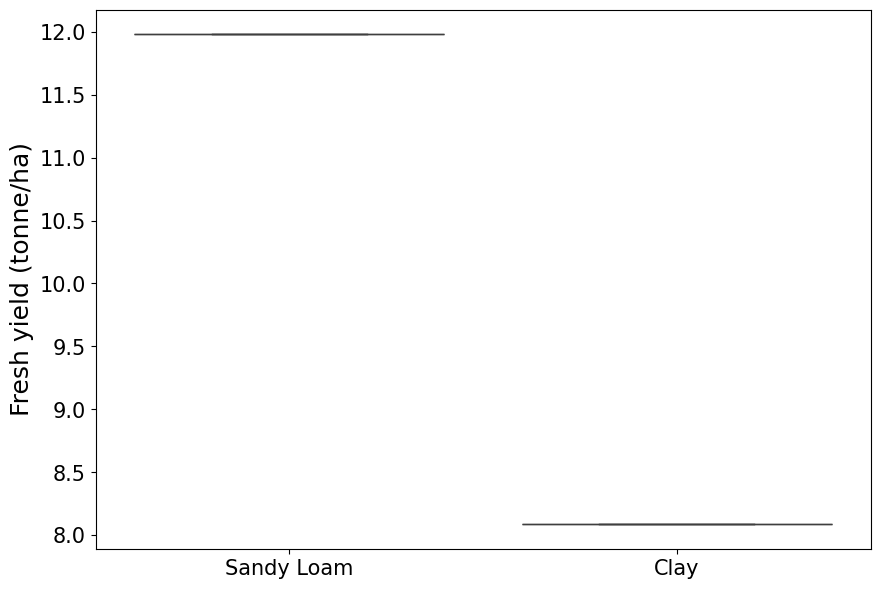

In [112]:
#create figure #3
fig_3,ax_3=plt.subplots(1,1,figsize=(10,7),)

# create box plot
sns.boxplot(data=all_outputs_3,x='label',y='Fresh yield (tonne/ha)',ax=ax_3,)

# labels and font sizes
ax_3.tick_params(labelsize=15)
ax_3.set_xlabel(' ')
ax_3.set_ylabel('Fresh yield (tonne/ha)',fontsize=18)

### Why boxplot shows a straight line?

El boxplot solo contiene valores de biomasa para una sola temporada y cosecha(harvest) por lo tanto los valores no se encuentran dispersos en el plano

In [134]:
#
# En esta simulacion se toman 6 temporadas , desde 1982 a 1988
# se cambiaran las fechas para evitar la sequia presente en
#
from aquacrop import *
import pandas as pd
from scipy.stats import ttest_ind  # or f_oneway, kruskal, ...

# -----------------------------------------------------------------------------
# 1.  USER SETTINGS
# -----------------------------------------------------------------------------
crop_name     = 'Maize'        # or 'Agave', 'Coffee'
soil_names    = ['Clay', 'SandyLoam']
start_years   = list(range(1990, 1998))     # six seasons
weather_file  = get_filepath('champion_climate.txt')
weather_df    = prepare_weather(weather_file)

# For perennial crops we simulate one long stretch.
# For annual crops we loop year-by-year.
is_annual = crop_name in ['Maize', 'Wheat', 'Soybean']  # <-- extend list

# -----------------------------------------------------------------------------
# 2.  HELPERS
# -----------------------------------------------------------------------------
def run_one_season(year, soil_name, annual=True):
    """Run a single season (annual crop) or a single stretch (perennial)."""

    soil = Soil(soil_name)

    if is_annual:
        crop = Crop(crop_name, planting_date='05/01')
        model = AquaCropModel(
            sim_start_time=f'{year}/05/01',
            sim_end_time=f'{year}/10/31',
            weather_df=weather_df,
            soil=soil,
            crop=crop,
            irrigation_management=IrrigationManagement(irrigation_method=0),
            initial_water_content=InitialWaterContent(value=['FC'])
        )
    else:  # perennial (agave, coffee, …)
        crop = Crop(crop_name)   # no planting date needed
        model = AquaCropModel(
            sim_start_time=f'{year}/01/01',
            sim_end_time=f'{year+5}/12/31',   # 6 growing years in one run
            weather_df=weather_df,
            soil=soil,
            crop=crop,
            irrigation_management=IrrigationManagement(irrigation_method=0),
            initial_water_content=InitialWaterContent(value=['FC'])
        )

    model.run_model(till_termination=True)
    out = model.get_simulation_results()   # one row per season
    out['soil'] = soil_name
    out['year'] = year
    out['crop'] = crop.Name
    return out

# -----------------------------------------------------------------------------
# 3.  RUN EVERYTHING
# -----------------------------------------------------------------------------
results = []

for soil in soil_names:
    for yr in start_years:
        results.append(run_one_season(yr, soil, annual=is_annual))

df = pd.concat(results, ignore_index=True)   # never overwritten again

# -----------------------------------------------------------------------------
# 4.  QUICK STATISTICAL TEST (Clay vs SandyLoam, 6 seasons)
# -----------------------------------------------------------------------------
clay_vals    = df.loc[df.soil=='Clay','Yield potential (tonne/ha)']
sandy_vals   = df.loc[df.soil=='SandyLoam','Yield potential (tonne/ha)']

t_stat, p_value = ttest_ind(clay_vals, sandy_vals)
print(f't={t_stat:.2f}, p={p_value:.3f}')

t=0.16, p=0.873


    year       soil   crop  Yield potential (tonne/ha)
0   1990       Clay  Maize                   13.668874
1   1991       Clay  Maize                   14.037981
2   1992       Clay  Maize                   13.031040
3   1993       Clay  Maize                   13.159443
4   1994       Clay  Maize                   13.977278
5   1995       Clay  Maize                   12.957258
6   1996       Clay  Maize                   13.773896
7   1997       Clay  Maize                   13.645506
8   1990  SandyLoam  Maize                   13.668874
9   1991  SandyLoam  Maize                   13.879796
10  1992  SandyLoam  Maize                   13.031373
11  1993  SandyLoam  Maize                   13.161169
12  1994  SandyLoam  Maize                   13.977415
13  1995  SandyLoam  Maize                   12.954233
14  1996  SandyLoam  Maize                   13.771988
15  1997  SandyLoam  Maize                   13.538650


/tmp/ipython-input-135-2189949827.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='soil',


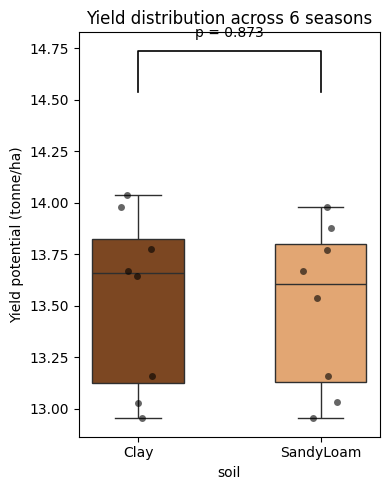

In [135]:
# ------------------------------------------------------------
# 5.  VISUAL CHECK: did we really get 6 seasons per soil?
# ------------------------------------------------------------
print(df[['year', 'soil','crop','Yield potential (tonne/ha)']])

# ------------------------------------------------------------
# 6.  COMPARATIVE BOXPLOT
# ------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,5))
ax = sns.boxplot(x='soil',
                 y='Yield potential (tonne/ha)',
                 data=df,
                 palette={'Clay':'#8B4513', 'SandyLoam':'#F4A460'},
                 width=0.5)

# Add individual points (optional but helps see n=6 per box)
sns.stripplot(x='soil',
              y='Yield potential (tonne/ha)',
              data=df,
              color='black',
              size=5,
              alpha=0.6,
              ax=ax)

# Annotate the p-value
x1, x2 = 0, 1   # positions of Clay and SandyLoam boxes
y_max  = df['Yield potential (tonne/ha)'].max() + 0.5
plt.plot([x1, x1, x2, x2], [y_max, y_max+0.2, y_max+0.2, y_max], lw=1.2, c='k')
plt.text((x1+x2)*.5, y_max+0.25,
         f'p = {p_value:.3f}' if p_value >= 0.001 else 'p < 0.001',
         ha='center', va='bottom', color='k')

plt.title('Yield distribution across 6 seasons')
plt.tight_layout()
plt.show()

# Appendix A: Built-in weather files

AquaCrop-OSPy includes a number of in-built weather files for different locations around the world, which users can select for model simulations. These have been taken from AquaCrop defaults (with the exception of Champion Nebraska **link**). In-built weather files currently include:


1.   Tunis (date) | 'tunis_climate.txt'
2.   Brussels (date) | 'brussels_climate.txt'
3.   Hyderabad (date) | 'hyderabad_climate.txt'
4.   Champion, Nebraska (date) | 'champion_climate.txt'

The filepath to these can be found using the `get_filepath` function and the data can be read in using the `prepare_weather` function.

In [ ]:
# get location of built in weather data file
path = get_filepath('hyderabad_climate.txt')
# read in weather data file and put into correct format
wdf = prepare_weather(path)
# show weather data
wdf.head()

,MinTemp,MaxTemp,Precipitation,ReferenceET,Date
0,11.3,27.3,0.0,3.6,2000-01-01
1,11.3,26.7,0.0,3.7,2000-01-02
2,8.6,26.7,0.0,3.4,2000-01-03
3,7.6,27.2,0.0,3.4,2000-01-04
4,9.1,27.9,0.0,3.4,2000-01-05


# Appendix B: Custom Soils

Custom soil classes can be created by passing 'custom' as the soil type when creating a `Soil`. In the cell below we create a custom soil with a curve number (CN=46) and readily evaporable water (REW=7). Here is a full list of the parameters you can specify:

Variable Name | Description | Default
--- | --- | ---
soilType | Soil classification e.g. 'sandy_loam' | REQUIRED
dz | thickness of each soil compartment e.g. 12 compartments of thickness 0.1m | [0.1]*12
CalcSHP | Calculate soil hydraulic properties (0 = No, 1 = Yes) | 0
AdjREW | Adjust default value for readily evaporable water (0 = No, 1 = Yes) | 1
REW | Readily evaporable water (mm) | 9.0
CalcCN | Calculate curve number (0 = No, 1 = Yes) | 1
CN | Curve Number | 61.0
zRes | Depth of restrictive soil layer (negative value if not present) | -999
 | **The parameters below should not be changed without expert knowledge** |
EvapZsurf | Thickness of soil surface skin evaporation layer (m) | 0.04
EvapZmin | Minimum thickness of full soil surface evaporation layer (m) | 0.15
EvapZmax | Maximum thickness of full soil surface evaporation layer (m) | 0.30
Kex | Maximum soil evaporation coefficient | 1.1
fevap | Shape factor describing reduction in soil evaporation in stage 2. | 4
fWrelExp | Proportional value of Wrel at which soil evaporation layer expands | 0.4
fwcc | Maximum coefficient for soil evaporation reduction due to sheltering effect of withered canopy | 50
zCN | Thickness of soil surface (m) used to calculate water content to adjust curve number | 0.3
zGerm | Thickness of soil surface (m) used to calculate water content for germination | 0.3
AdjCN | Adjust curve number for antecedent moisture content (0: No, 1: Yes) | 1
fshape_cr | Capillary rise shape factor | 16
zTop | Thickness of soil surface layer for water stress comparisons (m) | 0.1





In [ ]:
custom = Soil('custom',cn=46,rew=7)

Soil hydraulic properties are then specified using `.add_layer()`. This function needs the thickness of the soil layer [m] (just the depth of soil profile if only using 1 layer), the water content at Wilting Point [m^3/m^3], Field Capacity [m^3/m^3], Saturation [m^3/m^3], as well as the hydraulic conductivity [mm/day] and soil penetrability [%].

In [ ]:
custom.add_layer(thickness=custom.zSoil,thWP=0.24,
                 thFC=0.40,thS=0.50,Ksat=155,
                 penetrability=100)

Soil hydraulic properties can also be specified using the soil textural composition. This is done using the `.add_layer_from_texture()` function. This function needs the soil thickness [m], sand, clay, organic matter content [%], and the penetrability [%]

In [ ]:
custom = Soil('custom',cn=46,rew=7)
custom.add_layer_from_texture(thickness=custom.zSoil,
                              Sand=10,Clay=35,
                              OrgMat=2.5,penetrability=100)

To view your custom soil profile simple run the cell below.

In [ ]:
custom.profile

,Comp,Layer,dz,dzsum,zBot,z_top,zMid,th_dry,th_wp,th_fc,th_s,Ksat,penetrability,tau
0,0,1.0,0.1,0.1,0.1,0.0,0.05,0.1075,0.215,0.382,0.511,136.4,100,0.48
1,1,1.0,0.1,0.2,0.2,0.1,0.15,0.1075,0.215,0.382,0.511,136.4,100,0.48
2,2,1.0,0.1,0.3,0.3,0.2,0.25,0.1075,0.215,0.382,0.511,136.4,100,0.48
3,3,1.0,0.1,0.4,0.4,0.3,0.35,0.1075,0.215,0.382,0.511,136.4,100,0.48
4,4,1.0,0.1,0.5,0.5,0.4,0.45,0.1075,0.215,0.382,0.511,136.4,100,0.48
5,5,1.0,0.1,0.6,0.6,0.5,0.55,0.1075,0.215,0.382,0.511,136.4,100,0.48
6,6,1.0,0.1,0.7,0.7,0.6,0.65,0.1075,0.215,0.382,0.511,136.4,100,0.48
7,7,1.0,0.1,0.8,0.8,0.7,0.75,0.1075,0.215,0.382,0.511,136.4,100,0.48
8,8,1.0,0.1,0.9,0.9,0.8,0.85,0.1075,0.215,0.382,0.511,136.4,100,0.48
9,9,1.0,0.1,1.0,1.0,0.9,0.95,0.1075,0.215,0.382,0.511,136.4,100,0.48


Both these layer creation methods can be combined together to create multi layered soils. N.B. It is important to note that when you are using a multi layered soil profile, you must also specify a multi layered InitialWaterContent profile, otherwise the model will set all layers to the default Field Capacity (see Appendix D: Initial water content for full details).

In [ ]:
custom = Soil('custom',cn=46,rew=7)

custom.add_layer(thickness=0.3,thWP=0.24,
                 thFC=0.40,thS=0.50,Ksat=155,
                 penetrability=100)

custom.add_layer_from_texture(thickness=1.5,
                              Sand=10,Clay=35,
                              OrgMat=2.5,penetrability=100)

custom.profile

,Comp,Layer,dz,dzsum,zBot,z_top,zMid,th_dry,th_wp,th_fc,th_s,Ksat,penetrability,tau
0,0,1.0,0.1,0.1,0.1,0.0,0.05,0.1200,0.240,0.400,0.500,155.0,100.0,0.51
1,1,1.0,0.1,0.2,0.2,0.1,0.15,0.1200,0.240,0.400,0.500,155.0,100.0,0.51
2,2,1.0,0.1,0.3,0.3,0.2,0.25,0.1200,0.240,0.400,0.500,155.0,100.0,0.51
3,3,2.0,0.1,0.4,0.4,0.3,0.35,0.1075,0.215,0.382,0.511,136.4,100.0,0.48
4,4,2.0,0.1,0.5,0.5,0.4,0.45,0.1075,0.215,0.382,0.511,136.4,100.0,0.48
5,5,2.0,0.1,0.6,0.6,0.5,0.55,0.1075,0.215,0.382,0.511,136.4,100.0,0.48
6,6,2.0,0.1,0.7,0.7,0.6,0.65,0.1075,0.215,0.382,0.511,136.4,100.0,0.48
7,7,2.0,0.1,0.8,0.8,0.7,0.75,0.1075,0.215,0.382,0.511,136.4,100.0,0.48
8,8,2.0,0.1,0.9,0.9,0.8,0.85,0.1075,0.215,0.382,0.511,136.4,100.0,0.48
9,9,2.0,0.1,1.0,1.0,0.9,0.95,0.1075,0.215,0.382,0.511,136.4,100.0,0.48


In AquaCrop-OSPy, as in AquaCrop and AquaCrop-OS, the soil is split into compartments. By default these are 12 compartments of thickness 0.1m where the bottom layers will expand in order to exceed the maximum crop root depth.

This depth (`dz`) can be also be altered by the user by changing the `dz` argument. For example: Lets say we want the top 6 compartments to be 0.1m each and the bottom 6 compartments to be 0.2m each...

In [ ]:
sandy_loam = Soil('SandyLoam',dz=[0.1]*6+[0.2]*6)

Similarly default soil types can be adjust by passing in the changed variables.

In [ ]:
local_sandy_loam = Soil('SandyLoam',dz=[0.1]*6+[0.2]*6,cn=46,rew=7)
local_sandy_loam.profile.head()

,Comp,Layer,dz,dzsum,zBot,z_top,zMid,th_dry,th_wp,th_fc,th_s,Ksat,penetrability,tau
0,0,1.0,0.1,0.1,0.1,0.0,0.05,0.05,0.1,0.22,0.41,1200,100,1
1,1,1.0,0.1,0.2,0.2,0.1,0.15,0.05,0.1,0.22,0.41,1200,100,1
2,2,1.0,0.1,0.3,0.3,0.2,0.25,0.05,0.1,0.22,0.41,1200,100,1
3,3,1.0,0.1,0.4,0.4,0.3,0.35,0.05,0.1,0.22,0.41,1200,100,1
4,4,1.0,0.1,0.5,0.5,0.4,0.45,0.05,0.1,0.22,0.41,1200,100,1


# Apendix C: Custom Crops


It is more likely that the user will want to modify one of the built in crops (as opposed to modelling a brand new crop. To do this simply pass in the altered parameters when you create the `Crop`. Any parameters you specify here will override the crop defaults. To model a crop that does not have built in defaults, you can specify the crop type 'custom' and pass in all the parameters listed in the table below.

In [ ]:
local_wheat = Crop('Wheat',
                        planting_date='11/01',
                        harvest_date='06/30',
                        CGC = 0.0051,CDC = 0.0035)

Below is a full list of the crop parameters that can be altered.

Variable Name | Default | Description
--- | --- | ---
Name | | Crop Name e.ge. 'maize'
CropType | | Crop Type (1 = Leafy vegetable, 2 = Root/tuber, 3 = Fruit/grain)
PlantMethod | | Planting method (0 = Transplanted, 1 =  Sown)
CalendarType | | Calendar Type (1 = Calendar days, 2 = Growing degree days)
SwitchGDD | | Convert calendar to GDD mode if inputs are given in calendar days (0 = No; 1 = Yes)
PlantingDate | | Planting Date (mm/dd)
HarvestDate | | Latest Harvest Date (mm/dd)
Emergence  | | Growing degree/Calendar days from sowing to emergence/transplant recovery
MaxRooting  | | Growing degree/Calendar days from sowing to maximum rooting
Senescence  | | Growing degree/Calendar days from sowing to senescence
Maturity  | | Growing degree/Calendar days from sowing to maturity
HIstart  | | Growing degree/Calendar days from sowing to start of yield formation
Flowering  | | Duration of flowering in growing degree/calendar days (-999 for non-fruit/grain crops)
YldForm  | | Duration of yield formation in growing degree/calendar days
GDDmethod  | | Growing degree day calculation method
Tbase  | | Base temperature (degC) below which growth does not progress
Tupp  | | Upper temperature (degC) above which crop development no longer increases
PolHeatStress  | | Pollination affected by heat stress (0 = No, 1 = Yes)
Tmax_up  | | Maximum air temperature (degC) above which pollination begins to fail
Tmax_lo  | | Maximum air temperature (degC) at which pollination completely fails
PolColdStress | | Pollination affected by cold stress (0 = No, 1 = Yes)
Tmin_up  | | Minimum air temperature (degC) below which pollination begins to fail
Tmin_lo  | | Minimum air temperature (degC) at which pollination completely fails
TrColdStress  | | Transpiration affected by cold temperature stress (0 = No, 1 = Yes)
GDD_up  | | Minimum growing degree days (degC/day) required for full crop transpiration potential
GDD_lo | | Growing degree days (degC/day) at which no crop transpiration occurs
Zmin  | | Minimum effective rooting depth (m)
Zmax  | | Maximum rooting depth (m)
fshape_r | | Shape factor describing root expansion
SxTopQ  | | Maximum root water extraction at top of the root zone (m3\/ m3\/ day)
SxBotQ  | | Maximum root water extraction at the bottom of the root zone (m3\/ m3\/ day)
SeedSize | | Soil surface area (cm2) covered by an individual seedling at 90% emergence
PlantPop | | Number of plants per hectare
CCx   | | Maximum canopy cover (fraction of soil cover)
CDC  | | Canopy decline coefficient (fraction per GDD/calendar day)
CGC | | Canopy growth coefficient (fraction per GDD)
Kcb  | | Crop coefficient when canopy growth is complete but prior to senescence
fage | |  Decline of crop coefficient due to ageing (%/day)
WP  | | Water productivity normalized for ET0 and C02 (g/m2)
WPy | | Adjustment of water productivity in yield formation stage (% of WP)
fsink  | | Crop performance under elevated atmospheric CO2 concentration (%/100)
HI0  | | Reference harvest index
dHI_pre  | | Possible increase of harvest index due to water stress before flowering (%)
a_HI  | | Coefficient describing positive impact on harvest index of restricted vegetative growth during yield formation
b_HI | | Coefficient describing negative impact on harvest index of stomatal closure during yield formation
dHI0 | | Maximum allowable increase of harvest index above reference value
Determinant  | | Crop Determinacy (0 = Indeterminant, 1 = Determinant)
exc  | | Excess of potential fruits
p_up1 | | Upper soil water depletion threshold for water stress effects on affect canopy expansion
p_up2  | | Upper soil water depletion threshold for water stress effects on canopy stomatal control
p_up3  | | Upper soil water depletion threshold for water stress effects on canopy senescence
p_up4  | | Upper soil water depletion threshold for water stress effects on canopy pollination
p_lo1  | | Lower soil water depletion threshold for water stress effects on canopy expansion
p_lo2 | | Lower soil water depletion threshold for water stress effects on canopy stomatal control
p_lo3 | |  Lower soil water depletion threshold for water stress effects on canopy senescence
p_lo4  | | Lower soil water depletion threshold for water stress effects on canopy pollination
fshape_w1  | | Shape factor describing water stress effects on canopy expansion
fshape_w2 | | Shape factor describing water stress effects on stomatal control
fshape_w3  | | Shape factor describing water stress effects on canopy senescence
fshape_w4 | | Shape factor describing water stress effects on pollination
 | | **The paramaters below should not be changed without expert knowledge**
fshape_b | 13.8135 | Shape factor describing the reduction in biomass production for insufficient growing degree days
PctZmin | 70 | Initial percentage of minimum effective rooting depth
fshape_ex | -6 | Shape factor describing the effects of water stress on root expansion
ETadj | 1 | Adjustment to water stress thresholds depending on daily ET0 (0 | No, 1 | Yes)
Aer | 5 | Vol (%) below saturation at which stress begins to occur due to deficient aeration
LagAer | 3 | Number of days lag before aeration stress affects crop growth
beta | 12 | Reduction (%) to p_lo3 when early canopy senescence is triggered
a_Tr | 1 | Exponent parameter for adjustment of Kcx once senescence is triggered
GermThr | 0.2 | Proportion of total water storage needed for crop to germinate
CCmin | 0.05 | Minimum canopy size below which yield formation cannot occur
MaxFlowPct | 33.3 | Proportion of total flowering time (%) at which peak flowering occurs
HIini | 0.01 | Initial harvest index
bsted | 0.000138 | WP co2 adjustment parameter given by Steduto et al. 2007
bface | 0.001165 | WP co2 adjustment parameter given by FACE experiments



# Appendix D: Managment and initial conditions

Field management and groundwater conditions can also be specified in an AquaCrop-OSPy with a `FieldMngt` and `GroundWater` class object respectively. If these are not specified then they will default to None.

### Field management

Field Management is specified via the `FieldMngt`. These are largely based around the inclusion of either mulches or bunds. Two `FieldMngt` objects can be created for the fallow and growing period. The parameters you can specify in a `FieldMngt` are:

Variable Name | Type | Description | Default
--- | --- | --- | ---
Mulches| `bool` | Soil surface covered by mulches (True or False) | False
MulchPct| `float` |  Area of soil surface covered by mulches (%) | 50
fMulch| `float` |  Soil evaporation adjustment factor due to effect of mulches | 0.5
Bunds| `bool` |Surface bunds present (True or False) | False
zBund| `float` |  Bund height (m) | 0
BundWater| `float` |  Initial water height in surface bunds (mm) | 0.
CNadj| `bool` | field conditions affect curve number (True or False) | False
CNadjPct| `float` |   Change in curve number (positive or negative) (%) | 0
SRinhb| `bool` | Management practices fully inhibit surface runoff (True or False) | False


In the cell below we create an `AquaCropModel` passing in a `FieldMngt` with 100% field covering by mulches.



In [ ]:
mulches_model = AquaCropModel(sim_start_time=f'{1979}/10/01',
                      sim_end_time=f'{1985}/05/30',
                      weather_df=weather_data,
                      soil=sandy_loam,
                      crop=wheat,
                      initial_water_content=InitWC,
                      field_management=FieldMngt(mulches=True,
                                               mulch_pct=100,
                                               f_mulch=0.5))


In [ ]:
mulches_model.run_model(till_termination=True)


True

In [ ]:
# get final output
mulches_model._outputs.final_stats

,Season,crop Type,Harvest Date (YYYY/MM/DD),Harvest Date (Step),Yield (tonne/ha),Seasonal irrigation (mm)
0,0,Wheat,1980-04-15,196,8.940140,0
1,1,Wheat,1981-04-16,562,8.310045,0
2,2,Wheat,1982-04-16,927,9.136756,0
3,3,Wheat,1983-04-16,1292,8.811568,0
4,4,Wheat,1984-04-15,1657,8.682660,0
5,5,Wheat,1985-04-16,2023,8.924816,0


### Groundwater

We can also take a look at how to specify groundwater depth. This is done via the `GroundWater` which takes in the following parameters:

Variable Name | Type | Description | Default
--- | --- | --- | ---
WaterTable| `str` | water table considered 'Y' or 'N' | 'N'
Method | `str` | Water table input data = 'Constant' / 'Variable' | 'Constant'
dates| `list[str]` | water table observation dates 'YYYYMMDD' | []
values| `list[float]` | value at that location | []

The `GroundWater` needs a list of dates and water table depths. If `Method='Variable'` the water table depth will be linearly interpolated between these dates. The cell below creates a model with a constant groundwater depth of 2m


In [ ]:
# constant groundwater depth of 2m
gw_model = AquaCropModel(sim_start_time=f'{1979}/10/01',
                      sim_end_time=f'{1985}/05/30',
                      weather_df=weather_data,
                      soil=sandy_loam,
                      crop=wheat,
                      initial_water_content=InitWC,
                      groundwater=GroundWater(water_table='Y',
                                       dates=[f'{1979}/10/01'],
                                       values=[2])
                    )

In [ ]:
gw_model.run_model(till_termination=True)

True

In [ ]:
gw_model._outputs.final_stats

,Season,crop Type,Harvest Date (YYYY/MM/DD),Harvest Date (Step),Yield (tonne/ha),Seasonal irrigation (mm)
0,0,Wheat,1980-04-15,196,8.940140,0
1,1,Wheat,1981-04-16,562,8.310045,0
2,2,Wheat,1982-04-16,927,9.136769,0
3,3,Wheat,1983-04-16,1292,8.811568,0
4,4,Wheat,1984-04-15,1657,8.682660,0
5,5,Wheat,1985-04-16,2023,8.924816,0


### Initial water content

Finally, we can look at how to modify the initial water content. As a reminder from earlier in the notebook, here are the input parameters to choose from:

Variable Name | Type | Description | Default
--- | --- | --- | ---
wc_type| `str` | Type of value | 'Prop'
|| 'Prop' = 'WP' / 'FC' / 'SAT' |
|| 'Num' = XXX m3/m3 |
|| 'Pct' = % TAW |
Method | `str` | 'Depth' = Interpolate depth points; 'Layer' = Constant value for each soil layer | 'Layer'
depth_layer| `list` | locations in soil profile (soil layer or depth) | [1]
value| `list` | value at that location | ['FC']

In the cell below, we initialize the water content to be Field Capacity (FC) accross the whole soil profile like before, followed by an identical initial water content with all default values specified for clarity.

In [ ]:
# Default WC at Field Capacity:
InitWC = InitialWaterContent(value=['FC'])

# Same default WC but displaying all parameter values:
defaultWC = InitialWaterContent(wc_type = 'Prop',
                               method = 'Layer',
                               depth_layer= [1],
                               value = ['FC'])

For illustrative purposes, here is a range of possible initial water content specifications using the full range of AquaCrop's options:

In [ ]:
# Specify WC by Wilting Point (WP)
wpWC =  InitialWaterContent(wc_type = 'Prop',
                            method = 'Layer',
                            depth_layer= [1],
                            value = ['WP'])

# Specify WC by saturation (SAT)
satWC = InitialWaterContent(wc_type = 'Prop',
                            method = 'Layer',
                            depth_layer= [1],
                            value = ['SAT'])

# Specify WC by percentage of Total Available Water (% TAW)
tawWC = InitialWaterContent(wc_type = 'Pct',
                            method = 'Layer',
                            depth_layer= [1],
                            value = [80])

# Specify WC by an amount of water (m3/m3)
numWC = InitialWaterContent(wc_type = 'Prop',
                            method = 'Layer',
                            depth_layer= [1],
                            value = [0.2])

You can also create multi layered initial water content (IWC) profiles by increasing the length of the 'depth_layer' and 'value' lists, where the first value relates to the first (uppermost) soil layer. This is especially important when specifying custom multi layered soil profiles - if the number of layers in your IWC profile does not match the number of layers in your soil profile, the IWC of all soil layers will be set to Field Capacity.

In [ ]:
# If you have more than one soil layer, you can specify the initial water content of each layer.
# e.g. for soil profile with two layers, first filled to Field Capacity, second to Wilting Point:
multiWC =   InitialWaterContent(wc_type = 'Prop',
                                method = 'Layer',
                                depth_layer= [1,2],
                                value = ['FC', 'WP'])

# Alternatively you could specify two different % TAWs:
multiTawWC = InitialWaterContent(wc_type = 'Pct',
                                method = 'Layer',
                                depth_layer= [1,2],
                                value = [80, 50])

# Appendix E: Output files

There are 4 different outputs produced by the model:


1.  Daily Water Flux

Variable Name | Unit
--- | ---
water content | mm
groundwater depth | mm
surface storage | mm
irrigation |  mm
infiltration | mm
runoff | mm
deep percolation | mm
capillary rise | mm
groundwater inflow | mm
actual surface evaporation | mm
potential surface evaporation | mm
actual transpiration | mm
precipitation |  mm


2.   Soil-water content in each soil compartment

Variable Name | Unit
--- | ---
compartment water content | mm/mm

3.   Crop growth

Variable Name | Unit
--- | ---
growing degree days | -
cumulative growing degree days | -
root depth | m
canopy cover |  -
canopy cover (no stress) | -
biomass | kg/ha
biomass (no stress) | kg/ha
harvest index | -
adjusted harvest index | -
yield | t/ha

4.   Final summary (seasonal total)

Variable Name | Unit
--- | ---
yield | t/ha
total irrigation | mm



Use the `.head(N)` command to view the first N entries of the output files below

In [ ]:
# model._outputs.water_flux.head()
# model._outputs.water_storage.head()
# model._outputs.crop_growth.head()
model._outputs.final_stats.head()

,Season,crop Type,Harvest Date (YYYY/MM/DD),Harvest Date (Step),Yield (tonne/ha),Seasonal irrigation (mm)
0,0,Wheat,1980-04-15,196,8.940140,0
1,1,Wheat,1981-04-16,562,8.310045,0
2,2,Wheat,1982-04-16,927,9.136122,0
3,3,Wheat,1983-04-16,1292,8.811568,0
4,4,Wheat,1984-04-15,1657,8.682660,0
